<a href="https://colab.research.google.com/github/Rasamps/drug-misuse/blob/master/cluster_kproto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kmodes

In [12]:
import pandas as pd
#Load all the data and then filter for which features we want to use.
df = pd.read_csv('drug_cons_data.csv', header = 0)
df = df.filter(items = ['Ascore','Cscore','Escore','Nscore','Oscore','Cann','Nico'])
print(df.head())
print(df.columns)

    Ascore   Cscore   Escore   Nscore   Oscore Cann Nico
0 -0.91699 -0.00665 -0.57545  0.31287 -0.58331  CL0  CL2
1  0.76096 -0.14277  1.93886 -0.67825  1.43533  CL4  CL4
2 -1.62090 -1.01450  0.80523 -0.46725 -0.84732  CL3  CL0
3  0.59042  0.58489 -0.80615 -0.14882 -0.01928  CL2  CL2
4 -0.30172  1.30612 -1.63340  0.73545 -0.45174  CL3  CL2
Index(['Ascore', 'Cscore', 'Escore', 'Nscore', 'Oscore', 'Cann', 'Nico'], dtype='object')


In [0]:
import kmodes
from kmodes import kprototypes
def do_kproto(num_clusters, drugs):
  kproto = kprototypes.KPrototypes(n_clusters = num_clusters, n_init = 1, init = 'Cao', verbose = 1)
  kproto.fit_predict(drugs, categorical = [5,6])
  cost = kproto.cost_
  return cost

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 384, ncost: 8878.410321744677
Run: 1, iteration: 2/100, moves: 314, ncost: 8523.048741360577
Run: 1, iteration: 3/100, moves: 167, ncost: 8419.677741714097
Run: 1, iteration: 4/100, moves: 63, ncost: 8411.4709914625
Run: 1, iteration: 5/100, moves: 18, ncost: 8410.633373910894
Run: 1, iteration: 6/100, moves: 3, ncost: 8410.554317542978
Run: 1, iteration: 7/100, moves: 1, ncost: 8410.543303268776
Run: 1, iteration: 8/100, moves: 0, ncost: 8410.543303268776
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 466, ncost: 7541.4713475204835
Run: 1, iteration: 2/100, moves: 194, ncost: 7475.676378864878
Run: 1, iteration: 3/100, moves: 84, ncost: 7457.198571832263
Run: 1, iteration: 4/100, moves: 48, ncost: 7449.167009175102
Run: 1, iteration: 5/100, moves: 32, ncost: 7444.539464255652
Run: 1, iteration: 6/100, moves: 

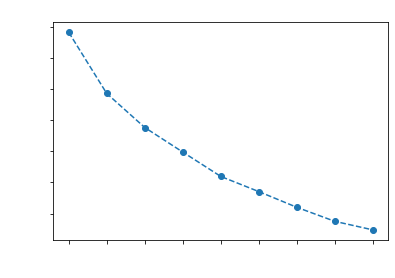

In [14]:
import matplotlib.pyplot as plt

scores = []
nums = []

for i in range(2,11):
  scores.append(do_kproto(i,df))
  nums.append(i)

plt.title('Clustering Score based on the Number of Clusters used', c = 'w')
plt.plot(nums, scores, marker = 'o', linestyle = 'dashed')
plt.xlabel('Number of Clusters', c ='w')
plt.xticks(c = 'w')
plt.ylabel('Clustering Score', c ='w')
plt.yticks(c = 'w')

plt.show()

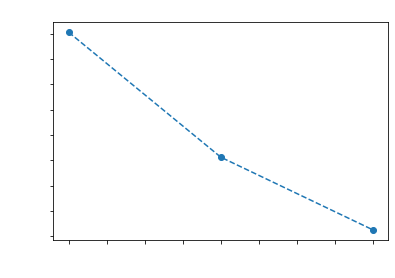

In [15]:
final_num_clusters = [2, 3, 4]
final_scores = []

for nums in final_num_clusters:
  kproto = kprototypes.KPrototypes(n_clusters = nums, max_iter = 100, init = 'Cao')
  kproto.fit_predict(df, categorical = [5, 6])
  cost = kproto.cost_
  final_scores.append(cost)

plt.title('Clustering Score for 4 & 5 Clusters', c = 'w')
plt.plot(final_num_clusters, final_scores, marker = 'o', linestyle = 'dashed')
plt.xlabel('Number of Clusters', c ='w')
plt.xticks(c = 'w')
plt.ylabel('Clustering Score', c ='w')
plt.yticks(c = 'w')

plt.show()

In [20]:

import numpy as np

final_kproto = kprototypes.KPrototypes(n_clusters = 2, max_iter = 200, init = 'Cao', n_init = 50,
                                       verbose = 1)

final_kproto.fit_predict(df, categorical = [5, 6])
print("The clustering score incurred is:", final_kproto.cost_)

labels = pd.DataFrame(final_kproto.labels_, columns = ['Cluster'])
num_labels = np.unique(final_kproto.labels_) #Gives the unique labels....
print("The unique labels are: ", num_labels)

data_with_labels = pd.concat((df,labels), axis = 1)

print(data_with_labels.head())

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/200, moves: 433, ncost: 8545.060939156696
Run: 1, iteration: 2/200, moves: 192, ncost: 8440.525716913711
Run: 1, iteration: 3/200, moves: 93, ncost: 8416.489986957444
Run: 1, iteration: 4/200, moves: 50, ncost: 8410.967430895138
Run: 1, iteration: 5/200, moves: 13, ncost: 8410.608351738514
Run: 1, iteration: 6/200, moves: 2, ncost: 8410.565720451048
Run: 1, iteration: 7/200, moves: 1, ncost: 8410.554708903848
Run: 1, iteration: 8/200, moves: 0, ncost: 8410.554708903848
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/200, moves: 361, ncost: 9171.312624155973
Run: 2, iteration: 2/200, moves: 408, ncost: 8515.88291861619
Run: 2, iteration: 3/200, moves: 165, ncost: 8429.388675922208
Run: 2, iteration: 4/200, moves: 74, ncost: 8413.56204649054
Run: 2, iteration: 5/200, moves: 26, ncost: 8411.043800759042
Run: 2, iteration: 6/200, moves: 1

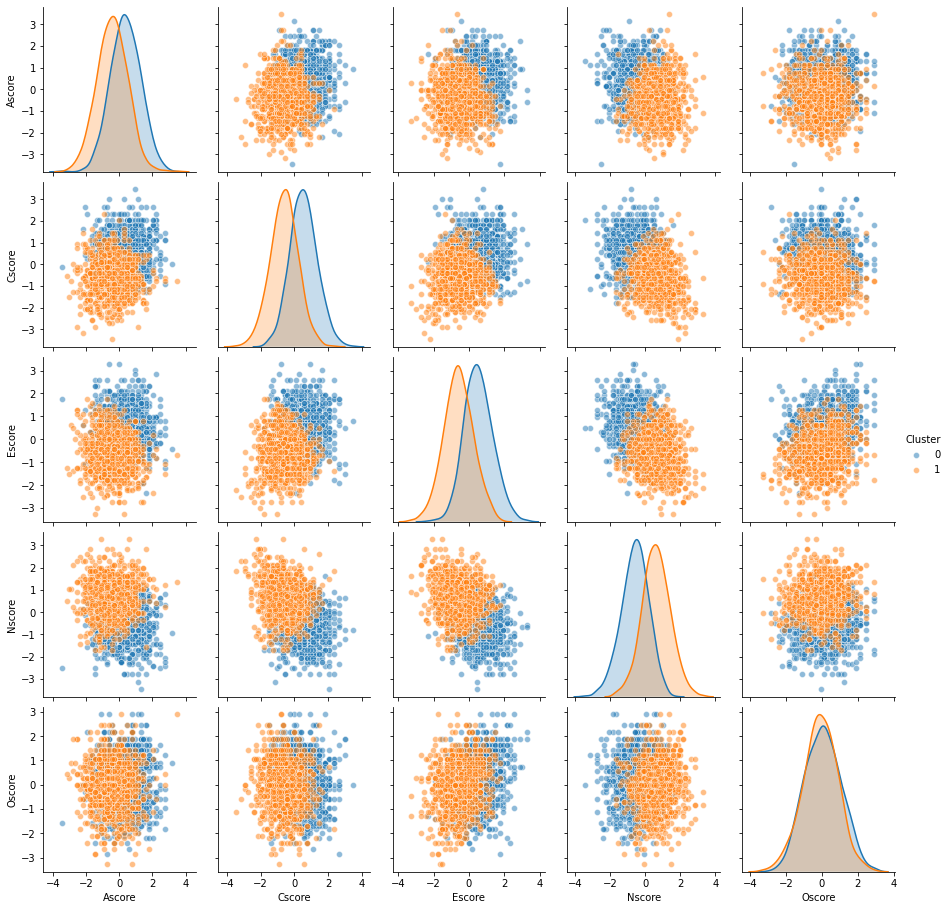

In [21]:
import seaborn as sns

sns.pairplot(data_with_labels, hue = 'Cluster', plot_kws={'alpha': 0.5})

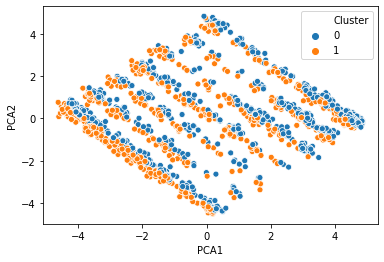

In [22]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

le = LabelEncoder()
pca2D = PCA(n_components = 2)

encoded_data = data_with_labels

cols = ['Cann','Nico']

for col in cols:
  encoded_data[col] = le.fit_transform(encoded_data[col])

clusters = encoded_data.filter(items = ['Cluster'])

cluster_2D_results = pca2D.fit_transform(encoded_data.drop(columns = ['Cluster']))
data_to_plot = pd.DataFrame(data= cluster_2D_results, columns = ['PCA1','PCA2'])
data_to_plot = pd.concat((data_to_plot,clusters),axis = 1)

sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'Cluster', data = data_to_plot)